In [1]:
import os, sys
sys.path.append('..')
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

from memory.episodic import EpisodicMemory

In [2]:
max_size = 10000
sim_threshold = 31
vector_dim = 200
stability_start = 1000

In [3]:
memory = EpisodicMemory(base_path='model_files',
                      max_size=max_size,
                      index_sim_threshold=sim_threshold,
                      vector_dim=vector_dim,
                      stability_start=stability_start)

In [4]:
state_m1 = np.random.random((200,))
action_m1 = random.choice(["up", "down", "left", "right"])

In [5]:
for it in range(10):
    state = np.random.random((200,))
    memory.update(state_m1, action_m1, state)
    state_m1 = state
    action_m1 = random.choice(["up", "down", "left", "right"])
    print(f"states : {memory.n_states}\ttransitions : {memory.n_transitions}\tforgeted states : {memory.forgeted}")

states : 2	transitions : 1	forgeted states : 0
states : 3	transitions : 2	forgeted states : 0
states : 3	transitions : 3	forgeted states : 0
states : 3	transitions : 3	forgeted states : 0
states : 3	transitions : 4	forgeted states : 0
states : 4	transitions : 5	forgeted states : 0
states : 5	transitions : 6	forgeted states : 0
states : 6	transitions : 7	forgeted states : 0
states : 6	transitions : 8	forgeted states : 0
states : 6	transitions : 9	forgeted states : 0


In [6]:
memory.n_states

6

In [7]:
memory.n_transitions

9

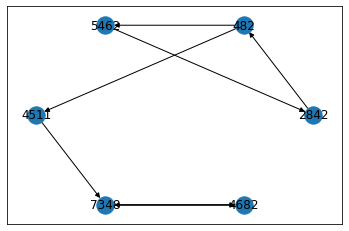

In [8]:
nx.draw_networkx(memory.tree_memory.graph, pos=nx.circular_layout(memory.tree_memory.graph))

In [11]:
memory.tree_memory.sample_trajectories(n=4, horizon=3)

[[(482, 482, 'right'), (482, 4511, 'down')],
 [(7348, 4682, 'right')],
 [(7348, 4682, 'left')],
 [(482, 482, 'right'), (482, 5462, 'down')]]